#### Use the ranster rensdering module to create ranster renders of test scene


In [1]:
import raster_relight as rr


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import pprint
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os
import glob

In [3]:
image_data_list, occupancy = rr.create_raster_images()

loading combined from /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined.png
loading normal from /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_normal.png
loading albedo from /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_albedo.png
loading depth from /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_depth.png
Got depth_alpha from 0 to 161 with mean of 63.2880296875. The datatype is uint8
Bit depth used for depth remapping was 8 and a max values of 255
Ater remapping got depth_remapped from 94 to 255 with mean of 191.7119703125. The datatype is uint8
After normalizing got depth_normalized from 0.3686274509803922 to 1.0 with mean of 0.7518116482843138. The datatype is float64
Occumpancy mask of shape (800, 800), and with 263345 occupied pixels.
Loaded /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intri

In [4]:
raster_images = []
for n,d in sorted(image_data_list):
    print(f"Forming {n} image")
    print(f"Image data given in {d.dtype}. Min: {d.min()}, Max: {d.max()}")
    d_int = d.astype(np.uint8)
    print(f"Image data made to {d_int.dtype}. Min: {d_int.min()}, Max: {d_int.max()}")
    image = np.ones((800,800,3)).astype(np.uint8) * 255
    image[occupancy] = d_int
    plt.imsave(f'raster_{n}_viewing-cosine.png', image)
    raster_images.append((n, image))

Forming behind image
Image data given in float64. Min: 0.0, Max: 197.72733469526602
Image data made to uint8. Min: 0, Max: 197
Forming bottom image
Image data given in float64. Min: 0.0, Max: 203.99885838898797
Image data made to uint8. Min: 0, Max: 203
Forming bottomleft image
Image data given in float64. Min: 0.0, Max: 203.97312433674855
Image data made to uint8. Min: 0, Max: 203
Forming bottomright image
Image data given in float64. Min: 0.0, Max: 198.5815599446614
Image data made to uint8. Min: 0, Max: 198
Forming left image
Image data given in float64. Min: 0.0, Max: 203.4730720581559
Image data made to uint8. Min: 0, Max: 203
Forming right image
Image data given in float64. Min: 0.0, Max: 202.51334174554108
Image data made to uint8. Min: 0, Max: 202
Forming top image
Image data given in float64. Min: 0.0, Max: 187.19828603735414
Image data made to uint8. Min: 0, Max: 187
Forming topleft image
Image data given in float64. Min: 0.0, Max: 203.210265910941
Image data made to uint8. M

In [5]:
# read in reference GTs
path = '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere'
gt_files = glob.glob(f"{path}/*combined_*")
gt_files.sort()

gt_files

['/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_behind.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_bottom.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_bottomleft.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_bottomright.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_left.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_right.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_top.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_sphere/r_000_combined_topleft.png',
 '/home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/intrinsic_tester_spher

In [6]:
gt_images = [plt.imread(f) for f in gt_files]

In [7]:
def two_plot(im0, im1, label0="", label1=""):
    plt.subplot(1, 2, 1)
    plt.title(label0)
    plt.imshow(im0)
    plt.subplot(1, 2, 2)
    plt.title(label1)
    plt.imshow(im1)
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(f"{label0.replace(' ', '-')}_{label1.replace(' ', '-')}_light_cosine_only.png".lower())

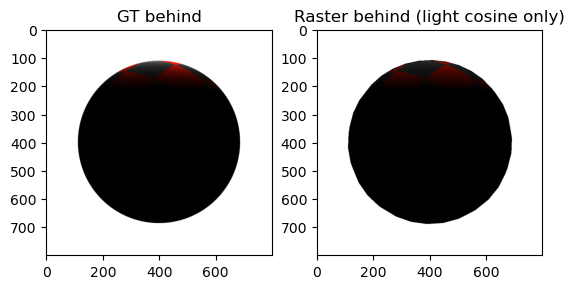

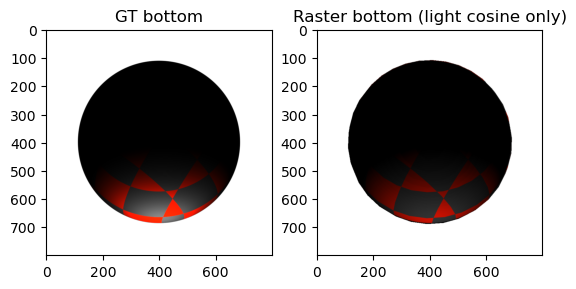

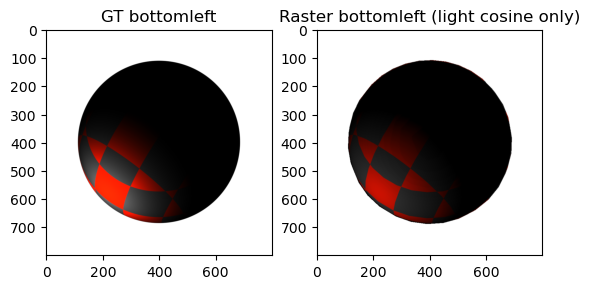

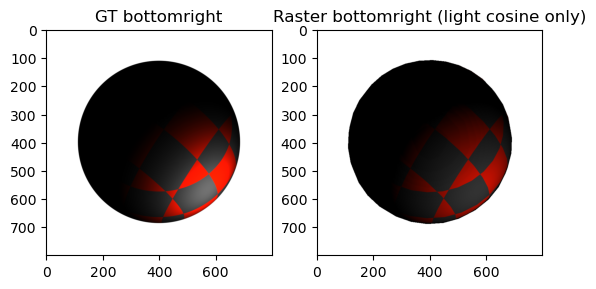

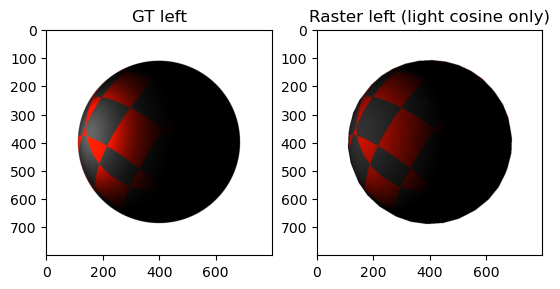

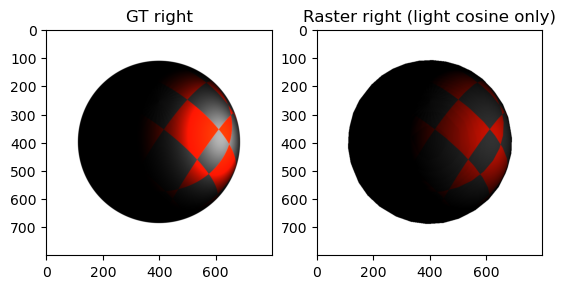

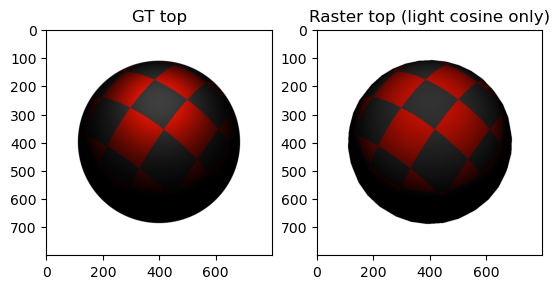

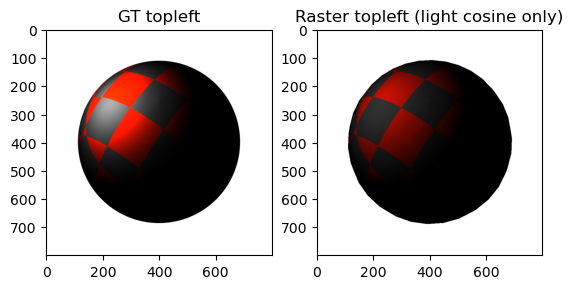

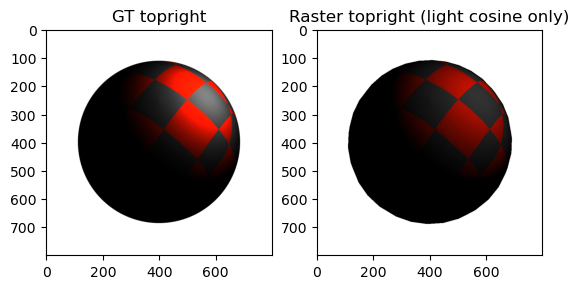

<Figure size 640x480 with 0 Axes>

In [8]:
# View and save the side-by-side figures
for i, v in enumerate(raster_images):
    two_plot(gt_images[i], v[1], label0=f"GT {v[0]}", label1=f"Raster {v[0]} (light cosine only)")